In [1]:
from IPython.display import display, Markdown
from IPython.display import Image

In [2]:
import datetime
from collections import defaultdict

## Reading data

In [3]:
import jsonpickle
flight_data = jsonpickle.decode(open('flight_data.json', 'r').read())

In [4]:
display(flight_data[0])

{'flightid': '1441220',
 'name': 'Uwe Wehding',
 'date': datetime.date(2021, 9, 12),
 'pilotid': '11606',
 'take_off': 'Schauinsland - DE',
 'landing': 'Schauinsland - DE\xa0[~3.2]',
 'take_off_time': datetime.timedelta(seconds=60919),
 'duration': datetime.timedelta(seconds=2759),
 'max_alt': 1121,
 'luftlinie': 4.2,
 'schirm': 'Skywalk Arak - S [LTF 1/2]'}

## Glider categorization

In [5]:
import re
cats = [
    (r'\[LTF A\]', 'A'),
    (r'\[LTF B\]', 'B'),
    (r'\[LTF C\]', 'C'),
    (r'\[LTF D\]', 'D'),

    (r'\[LTF 1\]', 'A'),
    (r'\[LTF 1/2\]', 'B'),
    (r'\[LTF 2\]', 'C'),
    (r'\[LTF 3\]', 'D'),

    (r'Pi 3', 'A'),
    (r'Mojo', 'A'),
    (r'Mescal', 'A'),
    (r'Symphonia', 'A'),

    (r'Chili 3', 'B'),
    (r'Epsilon', 'B'),
    (r'Iota 2', 'B'),
    (r'Epic', 'B'),
    (r'Optik', 'B'),
    (r'optic', 'B'),
    (r'Ion ?4', 'B'),
    (r'Mentor', 'B'),
    (r'Geo', 'B'),
    (r'Swift', 'B'),
    (r'Arak', 'B'),
    (r'Arriba', 'B'),
    (r'Chili', 'B'),
    (r'Cumeo', 'B'),
    (r'Tequila', 'B'),
    (r'Mistral', 'B'),
    (r'Nyos', 'B'),
    (r'Kibo', 'B'),
    (r'Crosscountry', 'B'),
    (r'Gravis', 'B'),
    (r'Phantom', 'B'),
    (r'Tenor Light', 'B'),
    (r'Arcus', 'B'),
    (r'Swing Nios', 'B'),
    (r'Triple Seven Triple 7 Rook 2', 'B'),
       
    (r'Volt 3', 'C'),    
    (r'Sector', 'C'),    
    (r'Alpina', 'C'),    
    (r'Delta', 'C'),    
    (r'Flow Fusion', 'C'),    
    
    (r'XC.RACER', 'D'),
    (r'Mantra', 'D'),
    (r'Meru', 'D'),
    (r'WillsWing T2C', 'D'),
]
cats = [ (re.compile(r, flags=re.IGNORECASE),c) for (r,c) in cats]

for fd in flight_data:
    for (r,c) in cats:
        if r.search(fd['schirm']):
            fd['cat'] = c
            break

display("Uncategorized gliders:", set(fd['schirm'] for fd in flight_data if 'cat' not in fd))

'Uncategorized gliders:'

set()

## Selecting date range

In [6]:
FIRST_DAY = datetime.date(2020,10,1)
LAST_DAY = datetime.date(2021,9,30)
print(f"Flights before: {len(flight_data)}")
flight_data = list(filter(lambda fd: FIRST_DAY <= fd['date'] and fd['date'] <= LAST_DAY, flight_data))
print(f"Flights after: {len(flight_data)}")

Flights before: 2365
Flights after: 1455


## Removing some flights

In [7]:
bad_flights = ['1358659']
display([fd for fd in flight_data if fd['flightid'] in bad_flights])
print(f"Flights before: {len(flight_data)}")
flight_data = list(filter(lambda fd: fd['flightid'] not in bad_flights, flight_data))
print(f"Flights after: {len(flight_data)}")

[{'flightid': '1358659',
  'name': 'Isabelle Noel',
  'date': datetime.date(2021, 3, 30),
  'pilotid': '14677',
  'take_off': 'Schauinsland - DE',
  'landing': 'Schauinsland - DE',
  'take_off_time': datetime.timedelta(seconds=58539),
  'duration': datetime.timedelta(seconds=28),
  'max_alt': 690,
  'luftlinie': 0.1,
  'schirm': 'Skywalk Mescal6 - XS [LTF A]',
  'cat': 'A'}]

Flights before: 1455
Flights after: 1454


## Flight time diagram

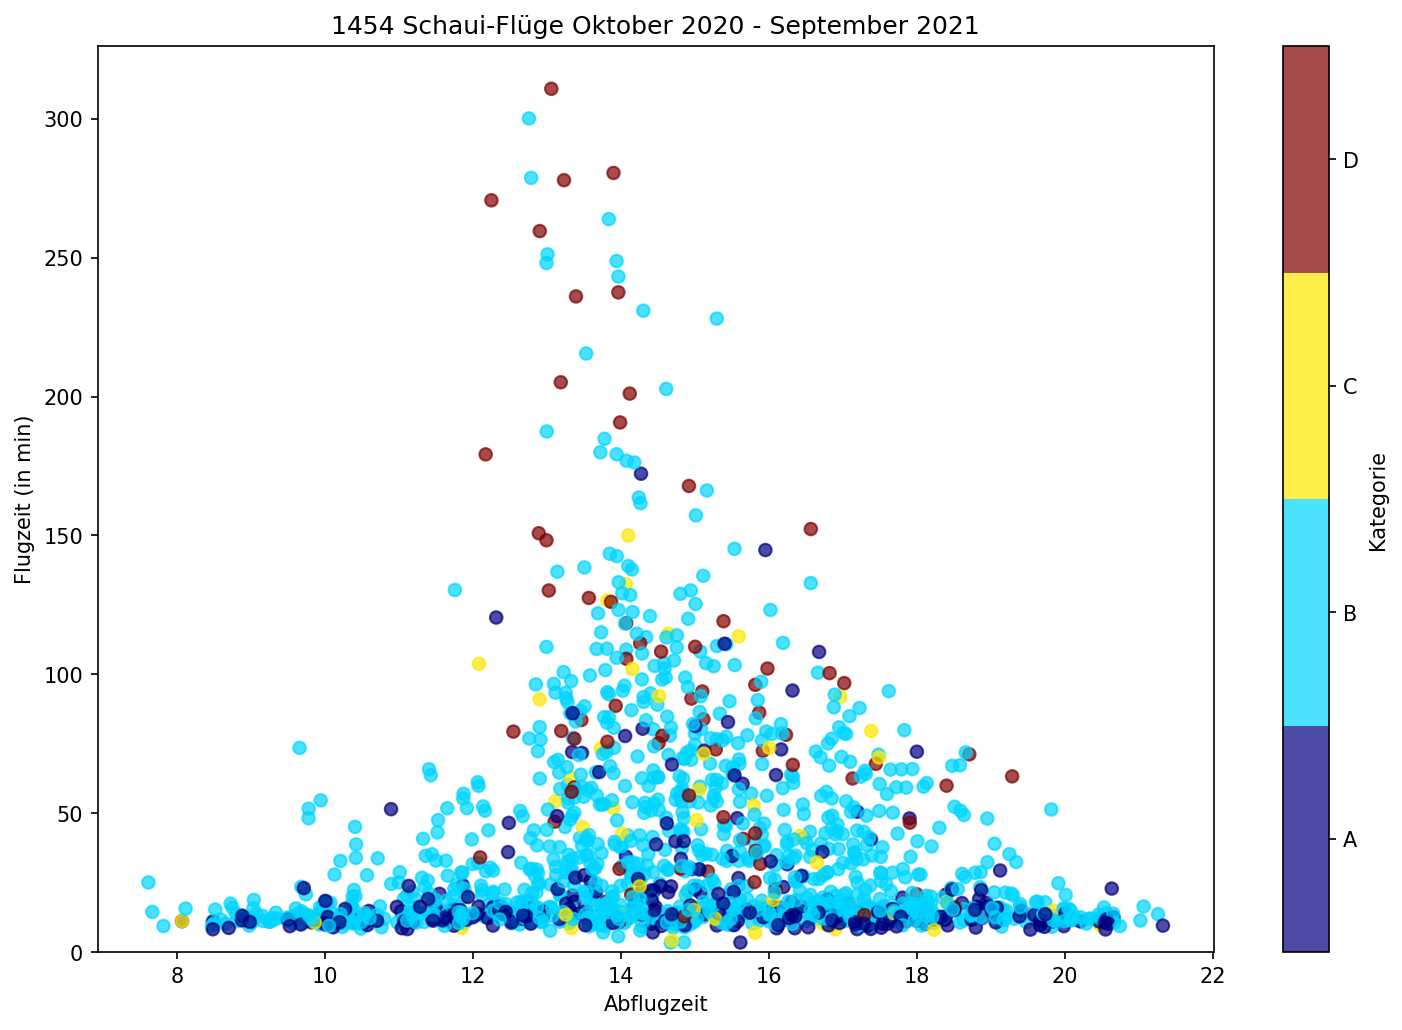

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import date2num
take_off = [ fd['take_off_time'] / datetime.timedelta(seconds=3600) for fd in flight_data ]
duration = [ fd['duration']      / datetime.timedelta(seconds=60)   for fd in flight_data ]
cat_list = ["A","B","C","D"]
cat =      [ cat_list.index(fd['cat'])                             for fd in flight_data ]
# month    = [ float(fd['date'].month)                                for fd in flight_data ]

plt.figure(figsize=(12, 8), dpi=150)
#cmap=plt.colors.ListedColormap(colors)
#cmap = LinearSegmentedColormap.from_list(plt.cm.'custom_colormap', all_colors, N=n_colors)
cmap = plt.cm.jet
norm = colors.BoundaryNorm([-0.5,0.5,1.5,2.5,3.5], ncolors=cmap.N)
plt.scatter(take_off, duration, c = cat, alpha=0.7, norm=norm, cmap=cmap)


cb = plt.colorbar(ticks=[0,1,2,3])
cb.ax.set_yticklabels(['A', 'B', 'C', 'D'])

cb.set_label('Kategorie')
plt.axis(ymin=0)
plt.xlabel("Abflugzeit")
plt.ylabel("Flugzeit (in min)")
plt.title(f"{len(flight_data)} Schaui-Flüge Oktober 2020 - September 2021")
plt.savefig("flugzeiten.png", facecolor="white")


## Simple stats

In [9]:
import statistics

by_id = { fd['flightid']: fd for fd in flight_data}
def pf(t, fd):
    display(Markdown(f"""
**{t}**: Flug [{fd['flightid']}](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID={fd['flightid']}): {fd['name']} am {fd['date']} um {fd['take_off_time']} für {fd['duration']} bis {fd['luftlinie']}km auf {fd['max_alt']}m
    """))
    
    
print(f"Total flights: {len(flight_data)}")
total_duration = sum([fd['duration'] for fd in flight_data], datetime.timedelta(0))
print(f"Total flying time: {total_duration}")
print(f"Average flying time: {total_duration / len(flight_data)}")
print(f"Median flying time: {statistics.median([fd['duration'] for fd in flight_data])}")
print(f"Average luftline: {sum([fd['luftlinie'] for fd in flight_data]) / len(flight_data)}")
print(f"Median luftlinie: {statistics.median([fd['luftlinie'] for fd in flight_data])}")
print(f"Number of gliders: {len(set(fd['schirm'] for fd in flight_data))}")


my_flight_data = [ fd for fd in flight_data if fd['name'] == "Joachim Breitner" ]
my_total_duration = sum([fd['duration'] for fd in my_flight_data], datetime.timedelta(0))
print(f"My total flying time: {my_total_duration}")
print(f"My average flying time: {my_total_duration / len(my_flight_data)}")

pf("Maximum flying time:",  max(flight_data, key = lambda fd: fd['duration']))
pf("Maximum luftlinie:", max(flight_data, key = lambda fd: fd['luftlinie']))
pf("Maximum height:",  max(flight_data, key = lambda fd: fd['max_alt']))
pf("Minimum flying time:",  min(flight_data, key = lambda fd: fd['duration']))
pf("My minimum flying time:", min(my_flight_data, key = lambda fd: fd['duration']))

pf("Longest low flight time:", max([ fd for fd in flight_data if fd['max_alt'] < 1170], key = lambda fd: fd['duration']))
pf("Farthest low flight time:", max([ fd for fd in flight_data if fd['max_alt'] < 1170], key = lambda fd: fd['luftlinie']))

a_flight_data = [ fd for fd in flight_data if fd['cat'] == "A" ]
a_total_duration = sum([fd['duration'] for fd in a_flight_data], datetime.timedelta(0))
print(f"A-Schirm average flying time: {a_total_duration / len(a_flight_data)}")
print(f"A-Schirm Median flying time: {statistics.median([fd['duration'] for fd in a_flight_data])}")
pf("A-Schirm farthest:", max(a_flight_data, key = lambda fd: fd['luftlinie']))
pf("A-Schirm Maximum flying time:", max(a_flight_data, key = lambda fd: fd['duration']))
pf("A-Schirm max height:",  max(a_flight_data, key = lambda fd: fd['max_alt']))


Total flights: 1454
Total flying time: 39 days, 0:23:13
Average flying time: 0:38:38.427098
Median flying time: 0:20:37.500000
Average luftline: 5.374621733149917
Median luftlinie: 3.4
Number of gliders: 150
My total flying time: 8:47:21
My average flying time: 0:23:58.227273



**Maximum flying time:**: Flug [1369640](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1369640): Henning Liebeck am 2021-04-25 um 13:03:24 für 5:10:49 bis 19.7km auf 2447m
    


**Maximum luftlinie:**: Flug [1360043](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1360043): Winfried Hetz am 2021-04-01 um 13:49:59 für 4:23:54 bis 97.7km auf 2976m
    


**Maximum height:**: Flug [1368298](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1368298): Henning Liebeck am 2021-04-24 um 13:13:42 für 4:37:54 bis 29.3km auf 3097m
    


**Minimum flying time:**: Flug [1428752](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1428752): Winfried Hetz am 2021-08-20 um 14:40:17 für 0:03:25 bis 0.5km auf 1129m
    


**My minimum flying time:**: Flug [1388476](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1388476): Joachim Breitner am 2021-06-13 um 14:51:01 für 0:03:29 bis 0.9km auf 1146m
    


**Longest low flight time:**: Flug [1438309](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1438309): Stefan Meier am 2021-09-08 um 14:07:27 für 2:08:31 bis 3.9km auf 1148m
    


**Farthest low flight time:**: Flug [1386446](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1386446): Martin Bloße am 2021-06-10 um 14:09:24 für 0:32:20 bis 8.5km auf 1144m
    

A-Schirm average flying time: 0:21:36.199262
A-Schirm Median flying time: 0:13:44



**A-Schirm farthest:**: Flug [1359537](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1359537): Isabelle Noel am 2021-03-31 um 15:31:57 für 1:03:36 bis 9.2km auf 1948m
    


**A-Schirm Maximum flying time:**: Flug [1390830](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1390830): Rafael Grüninger am 2021-06-16 um 14:16:06 für 2:52:14 bis 2.6km auf 2217m
    


**A-Schirm max height:**: Flug [1390830](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1390830): Rafael Grüninger am 2021-06-16 um 14:16:06 für 2:52:14 bis 2.6km auf 2217m
    

# Per-pilot stats

In [10]:
pilot_time = defaultdict(datetime.timedelta)
pilot_count = defaultdict(int)
pilot_days = defaultdict(set)
for fd in flight_data:
    pilot_time[fd['name']] += fd['duration']
    pilot_count[fd['name']] += 1
    pilot_days[fd['name']].add(fd['date'])

print(*max(pilot_time.items(), key = lambda t: t[1]))
print(*max(pilot_count.items(), key = lambda t: t[1]))
print(*max([(n,len(d)) for (n,d) in pilot_days.items()], key = lambda t: t[1]))
    

Volker Jung 4 days, 4:46:03
Volker Jung 275
Volker Jung 119


## Überholstatistik

In [11]:
events = []
for fd in flight_data:
    dt = datetime.datetime.combine(fd['date'], datetime.datetime.min.time())
    events.append({'time': dt + fd['take_off_time'], 'flight': fd['flightid'], 'takeoff' : True})
    events.append({'time': dt + fd['take_off_time'] + fd['duration'], 'flight': fd['flightid'], 'takeoff' : False})
events.sort(key = lambda x: x['time'])
events[:3]

in_the_air = set()
started_before = {}
overtaken = {}
overtaken_stats = defaultdict(int)
for e in events:
    if e['takeoff']:
        started_before[e['flight']] = in_the_air.copy()
        in_the_air.add(e['flight'])
    else:
        in_the_air.remove(e['flight'])
        ot = started_before[e['flight']].intersection(in_the_air)
        if ot: overtaken[e['flight']] = ot
        for o in ot:
            overtaken_stats[o] += 1
            
overtaking_stats = {k: len(v) for k, v in overtaken.items()}

overtaking_most = sorted(overtaking_stats.items(), key=lambda k: k[1], reverse=True)[:3]
display(overtaking_most)
pf("Am meisten überholt", by_id[overtaking_most[0][0]])
pf("Am zweitmeisten überholt", by_id[overtaking_most[1][0]])

overtaken_most = sorted(overtaken_stats.items(), key=lambda k: k[1], reverse=True)[:3]
display(overtaken_most)
pf("Am meisten oft überholt", by_id[overtaken_most[0][0]])
pf("Am zweitmeisten oft überholt", by_id[overtaken_most[1][0]])


pilot_overtaking = defaultdict(int)
for k, v in overtaking_stats.items():
    pilot_overtaking[by_id[k]['name']] += v
display(sorted(pilot_overtaking.items(), key = lambda k: k[1], reverse=True)[:3])


pilot_overtaken = defaultdict(int)
for k, v in overtaken_stats.items():
    pilot_overtaken[by_id[k]['name']] += v
display(sorted(pilot_overtaken.items(), key = lambda k: k[1], reverse=True)[:3])

[('1358988', 18), ('1355222', 16), ('1355128', 15)]


**Am meisten überholt**: Flug [1358988](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1358988): Igor Iegupov am 2021-03-31 um 15:36:41 für 0:03:27 bis 0.9km auf 1193m
    


**Am zweitmeisten überholt**: Flug [1355222](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1355222): Joachim Breitner am 2021-03-24 um 15:19:14 für 0:13:51 bis 3.2km auf 1144m
    

[('1355044', 34), ('1368438', 20), ('1358860', 19)]


**Am meisten oft überholt**: Flug [1355044](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1355044): Henning Liebeck am 2021-03-24 um 13:23:24 für 3:56:04 bis 5.7km auf 1384m
    


**Am zweitmeisten oft überholt**: Flug [1368438](https://www.dhv-xc.de/leonardo/index.php?op=show_flight&flightID=1368438): Winfried Hetz am 2021-04-24 um 12:45:16 für 5:00:08 bis 37.9km auf 3017m
    

[('Isabelle Noel', 69), ('Volker Jung', 58), ('Igor Iegupov', 53)]

[('Henning Liebeck', 145), ('Volker Jung', 95), ('Winfried Hetz', 80)]

## Tagesstatistik

In [12]:
import itertools

events_by_day = map(lambda t: (t[0],list(t[1])), itertools.groupby(events, key = lambda e: by_id[e['flight']]['date']))

first = defaultdict(int)
last = defaultdict(int)
both = defaultdict(int)
only = defaultdict(int)
for (_, es) in events_by_day:
    e1 = es[0]
    e2 = es[-1]
    first[by_id[e1['flight']]['name']] +=1 
    last[by_id[e2['flight']]['name']] +=1 
    if by_id[e1['flight']]['name'] == by_id[e2['flight']]['name']:
        both[by_id[e1['flight']]['name']] +=1 
    if all(by_id[e['flight']]['name'] == by_id[e1['flight']]['name'] for e in es):
        only[by_id[e1['flight']]['name']] +=1 

display(sorted(first.items(), key = lambda k: k[1], reverse=True)[:3])
display(sorted(last.items(), key = lambda k: k[1], reverse=True)[:3])
display(sorted(both.items(), key = lambda k: k[1], reverse=True)[:3])
display(sorted(only.items(), key = lambda k: k[1], reverse=True)[:3])

[('Volker Jung', 65), ('Henning Liebeck', 9), ('Kai Flogaus', 8)]

[('Volker Jung', 71), ('Isabelle Noel', 9), ('Henning Liebeck', 6)]

[('Volker Jung', 38), ('Martin Bloße', 3), ('Henning Liebeck', 2)]

[('Volker Jung', 15), ('Martin Bloße', 3), ('Henning Liebeck', 1)]

# Höher? Weiter? Schneller!

_Eine etwas anderes Flugdatenauswertung._


Es ist Anfang Oktober, die Wolken verhüllen den Schauinsland, und ans Fliegen ist nicht zu denken. Eine gute Gelegenheit die letzte Saison revue passieren zu lassen. Da ich ein Faible für Statistiken und Schaubilder habe, und für die Colibri-Funcup-Statistik sowieso schon einen Import der DHV-XC-Flugdaten haben, setzte ich mich daran, diesen Datenschatz zu heben.

Dazu habe ich alle Flüge vom Schauinsland von Oktober 2020 bis September 2021 vom DHV-XC-Server geladen („gescrapt“, wie man so schön sagt). Das sind 1454 Flüge, und ein paar „offensichtliche“ Statistiken sind schnell erstellt: Alle Flüge zusammen ergibt das eine Airtime von 39 Tagen, und somit im Schnitt 38 Minuten. Das klingt nach mehr als man intuitiv wohl vermutet, angesichts der vielen 15-Minuten-Abgleiter, aber der Durchschnitt wird eben stark von wenigen langen Flügen beeinflusst. Der Median von 20 Minuten (das heißt, die Hälfte der Flüge sind kürzer als 20 Minuten) klingt da schon richtiger.

Natürlich schauen wir uns erstm einmal die übrlichen Rekorde an: Henning Liebeck hat den längsten (5h10 am 25. April, \#1369640) und den höchsten Flug (3097m am 24. April, \#1368298), der weiteste Flug nach Luftlinie ist Winfried Hetz’ Flug nach Konstanz (20. August, \#1428752). Und Volker Jung flog am häufigsten (275 Flüge), am längsten (4 Tage 4h46), an den meisten Tagen (119), war an den meisten Tagen der erste am Berg (65 Tage), der letzte am Berg (71 Tage), der erste und der letzte (38 Tage) oder gleich der einzige überhaupt (15 Tage) – jeweils mit unüberwindbarem Abstand zum nächsten.

Wirklich überraschend war davon jetzt allerdings nichts – wir brauchen dringend andere Kriterien, am besten solche bei denen auch ich eine Chance habe! Wie wäre es denn mit dem kürzesten Flug? Mich hat doch am 13. Juli der Nordeinschlag direkt zur Holzschlägermatte gespült, so dass ich nach 3½ Minuten schon wieder auf dem Boden stand (\#1388476). Aber nein, selbst diese Trophäe schnappt sich Winfried, dem am 20. August wohl das selbe Schicksal ereilte, nur 4 Sekunden schneller (\#1428752).

Ich muss also weiter suchen, wenn ich einen Preis absahnen möchte. Aber ich habe eine Idee: Immer wieder starte ich in ein Fluggebiet voller frühlich kreisender und steigender Piloten, segele da fröhlich durch die Mitte, finde nichts, stehe wenige Minuten später am Landeplatz und sehe dem Treiben nun von unten zu. Schon wieder wieder alle überholt! Vielleicht können wir wenigstens daraus einen Wettbewerb bauen? Am 24. März habe ich so immerhin 16 andere Piloten überholt (\#1355222). Das soll mir erst einmal einer nachmachen… doch auch hier muss ich mich geschlagen geben; Igor Iegupov schaffte es am 31. März sogar, 18 andere Flieger zu überholen (\#1358988:)! Insgesamt hatte Isabelle Noel am häufigsten das zweifelhafte Vergnügen, unter 69 anderen Fliegern durchzufliegen, dicht gefolgt von Volker mit 58 mal.

Und andersrum, welcher Flug wurde am häufigsten überholt? Den Preis holt sich Henning, der am 24. März knapp vier Stunden in der Luft war; in der Zeit starteten und landeten 34 andere (\#1355044). Insgesamt ließ sich Henning 145 mal überholen. Auch hier geht der zweite Platz an Volker, der 95 überholt wurde.

Ich gebe es auf, die Kriterien auf mich zuzuschneiden. Aber einfach nur „Höher, Weiter, Länger“ ist langweilig. Wie ist es denn mit Weiter und Länger, aber ohne hoch? Leider zeigt DHV-XC nicht den kumulierten Höhengewinn an, sonst würde ich jetzt schauen, wer auch ohne Steigen am längsten Fliegen kan. Als nächste Näherung nehme ich eben Flüge ohne Startüberhöhung (maximale Höhe < 1170m). Da hat Stefan Meier mit 2h08 den längsten Flug (8. September, \#1438309) und Martin Bloße den weitesten (10. Juni, über Horben bis hinter Wittnau, \#1386446).

Ähnlich können wir uns die A-Schirm-Piloten anschauen: Hier glänzt Isabelle Noel mit dem weitesten Flug zur Wonnhalde vor (13. März, \#1359537) und Rafael Grüninger flog am 16. Juni gleichzeitig am höchsten und längsten (2h52, 2217m, \#1390830).

Damit habe ich meinen Appetit nach unnötiger Statistik gestillt. Deinen noch nicht? Dann schreib mir doch per Slack was du wissen willst – oder mach es selber! Die Statistiken wurden alle mit wenigen Zeilen schnödem Python-Code erstellt, der in einem Jupyter-Notebook steht. Dieses kannst du von <https://github.com/nomeata/schauinslandstats> herunter laden oder per <https://mybinder.org/v2/gh/nomeata/schauinslandstats/master?urlpath=tree/Schauinsland.ipynb> direkt im Browser öffnen.